## Feature-Class Correlation Analysis: Factors influencing product subscription 

### Objective

This analysis aims to model the factors which influence whether or not a user subscribes to a product. The adopted approach visually and statistically investigates possible correlation of the candidate numerical and categorical features in the dataset with the given target attribute "subscribed". Visual analysis of correlation for numerical features includes boxplots and overlaid histograms, whereas visual analysis of correlation for categorical features includes contingency tables and stacked bar plots. Feature ranking is then performed based on ANOVA (for numerical features) and Chi-Squared (for categorical features) statistical hypothesis tests. 

As the number of non-subscribed users is significantly higher than the subscribed ones, undersampling on the dataset is performed prior to the analysis. 

All the functions invoked in the analysis have been implemented in the accompanying **correlation_plot_functions.ipynb** notebook. 

### Assumptions

- For the statistical tests performed, it is assumed that all features have normal distributions in the original data, and that random sampling has been applied.

### Replication instructions

- The cells of this notebook have been run using Anaconda 4.3.34 for Python 2.7.13 
- The seaborn library has been downgradded to version 0.7.1. 
- This notebook runs the accompanying "correlation_plot_functions.ipynb" notebook, which contains the implementation of all the code / functions required by the analysis. 
- All the notebooks and the CSV dataset file (not pushed to this repo) should be in the the same directory

### Run the notebook containing the implemented functions

In [1]:
%run "correlation_plot_functions.ipynb"
# display the plots inline inside the notebook
%matplotlib inline

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Input parameters definition and values

In [2]:
# dataset_csv is the CSV file containing the dataset for analysis, assumed to be in the current directory
dataset_csv = "myob_challenge_dataset.csv"
# target is a string representing the target attribute (class) whose correlation with features to be investigated 
target = "subscribed"
# usample is True if undersmapling is to be applied on the target, False if the original data to be considered
usample = True
# prop is True if the feature proportions per target class to be displayed in contingency tables, False if actual counts
prop = True
# anova_order_by is the column name to be used to order the 1-way ANOVA statistics data frame
# should be one of ['sum_sq', 'esq_sm', 'F', 'PR(>F)']
anova_order_by = 'F'
#anova_ascending is True if the ANOVA dataframe is sorted ascendingly by anova_order_by, False if descendingly
anova_ascending = False
# chi2_order_by is the column name to be used to order the chi-squared statistics data frame
# should be one of ['chi2', 'Pr(>chi)']
chi2_order_by = 'chi2'
#chi2_ascending is True if the chi2 dataframe is sorted ascendingly by chi2_order_by, False if descendingly
chi2_ascending = False

### Instantiate the AdhocCorrelationUtilities Class with given input parameters

In [3]:
util = AdhocCorrelationUtilities(dataset_csv, target, usample)

### Parse the "payload" column and check that undersampling on the target attribute has worked

In [4]:
df = util.get_df()
print("Distribution of the target attribute classes:")
df.subscribed.value_counts()

Distribution of the target attribute classes:


True     14827
False    14827
Name: subscribed, dtype: int64

### Display available numerical and categorical features in the dataset

In [5]:
print("numerical features:")
print(util.get_num_cols_rules())
print('--------------')
print("categorical features:")
print(util.get_cat_cols_rules())

numerical features:
['time_in_product_mins', 'email_open_rate_percent']
--------------
categorical features:
['country', 'industry', 'campaign', 'device', 'referrer_channel']


### Correlation analysis of numerical features with the target 

#### box plots

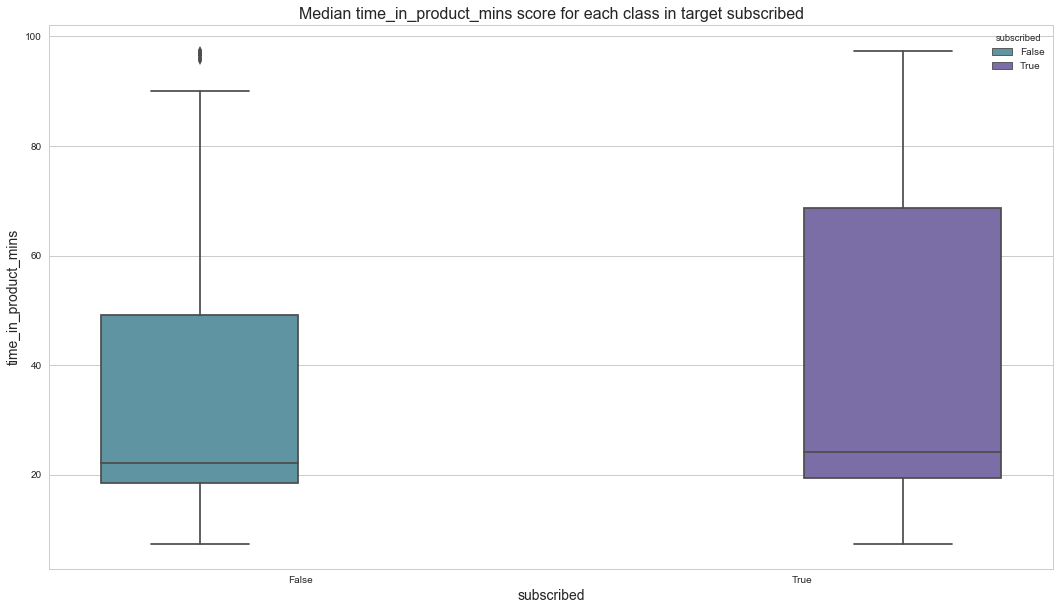

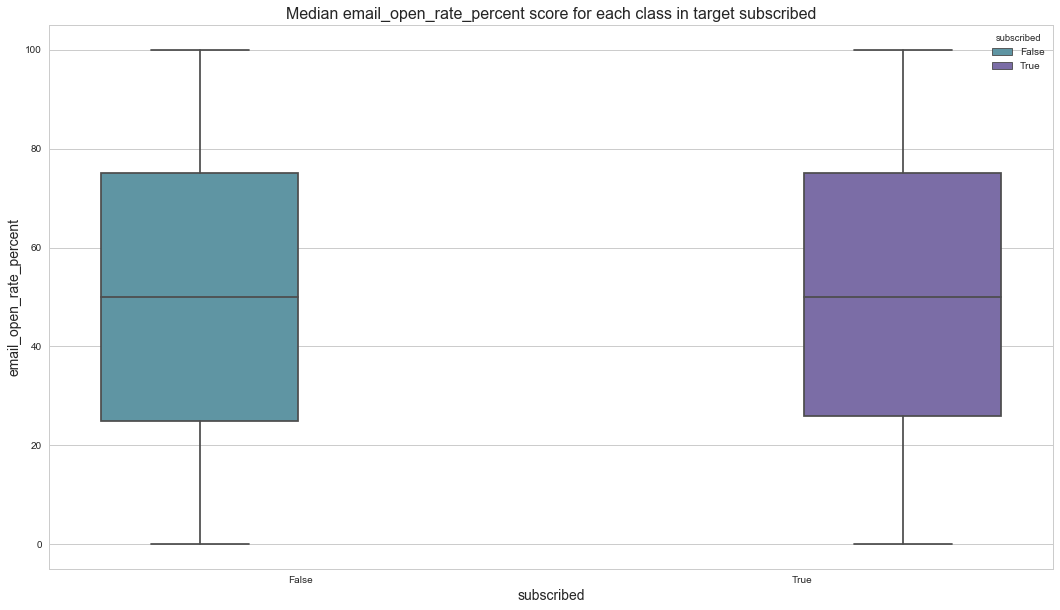

In [6]:
util.boxplots(target = target)

#### overlaid histograms

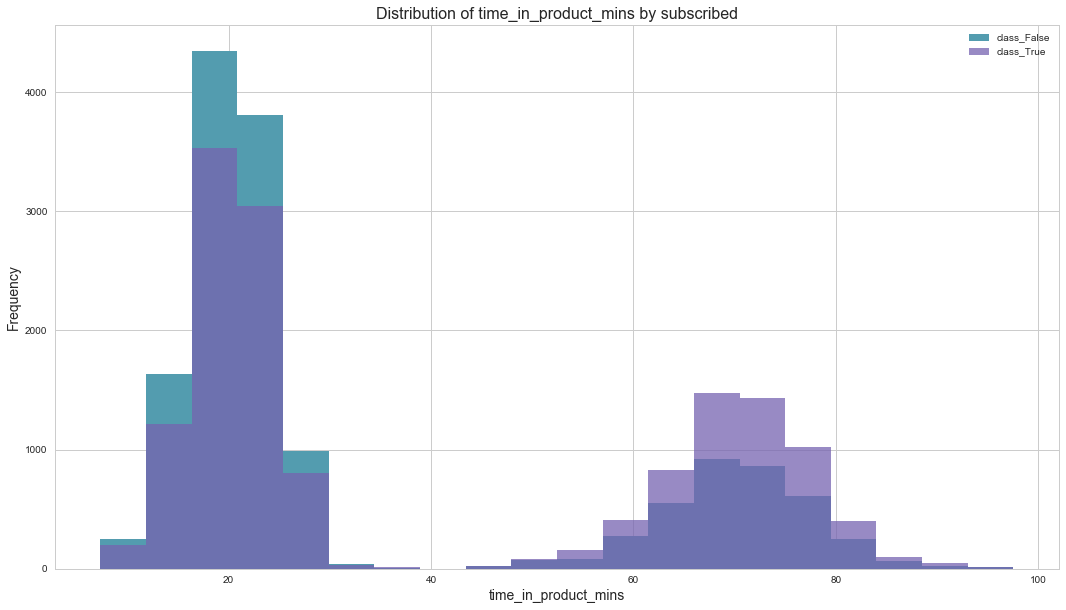

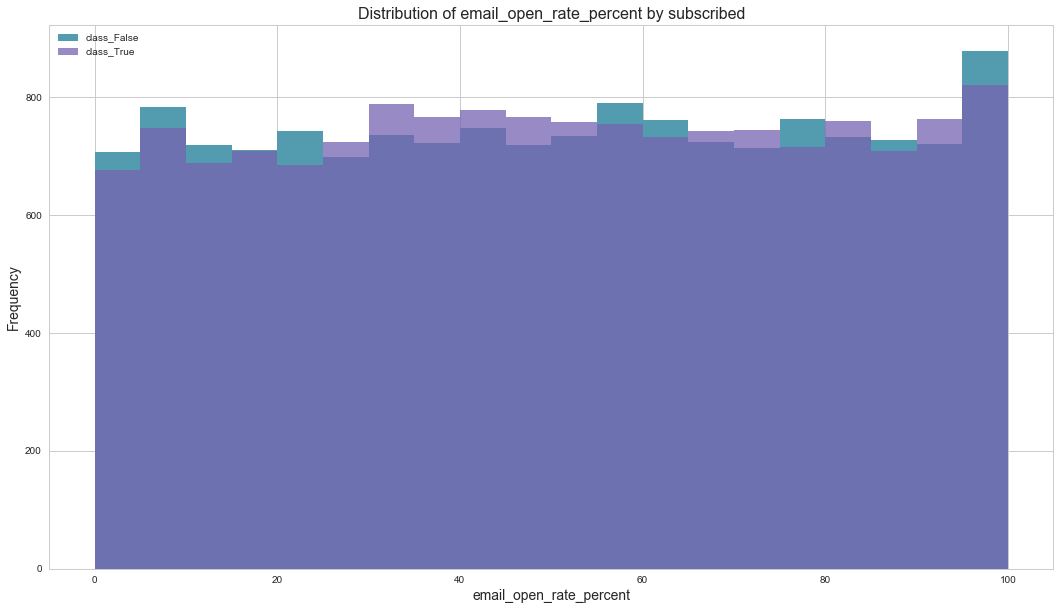

In [7]:
util.overlaid_histograms(target = target)

### Correlation analysis of categorical features with the target

#### contingency tables

In [8]:
util.contingency_tables(target = target, prop = prop)

Proportions of feature country per each class of target subscribed


country,AU,NZ
subscribed,,
False,0.503817,0.498715
True,0.496183,0.501285


Proportions of feature industry per each class of target subscribed


industry,Construction,Education,Finance,Healthcare,Hospitality,IT
subscribed,,,,,,
False,0.501259,0.498101,0.495073,0.517009,0.489046,0.492984
True,0.498741,0.501899,0.504927,0.482991,0.510954,0.507016


Proportions of feature campaign per each class of target subscribed


campaign,au_nz_eofy,au_nz_mobile_product_launch,au_nz_new_business
subscribed,,,
False,0.469555,0.539507,0.475706
True,0.530445,0.460493,0.524294


Proportions of feature device per each class of target subscribed


device,Desktop,Mobile
subscribed,,
False,0.463758,0.538919
True,0.536242,0.461081


Proportions of feature referrer_channel per each class of target subscribed


referrer_channel,Direct,Organic,Paid adversiting
subscribed,,,
False,0.418884,0.544312,0.535615
True,0.581116,0.455688,0.464385


#### stacked bar plots

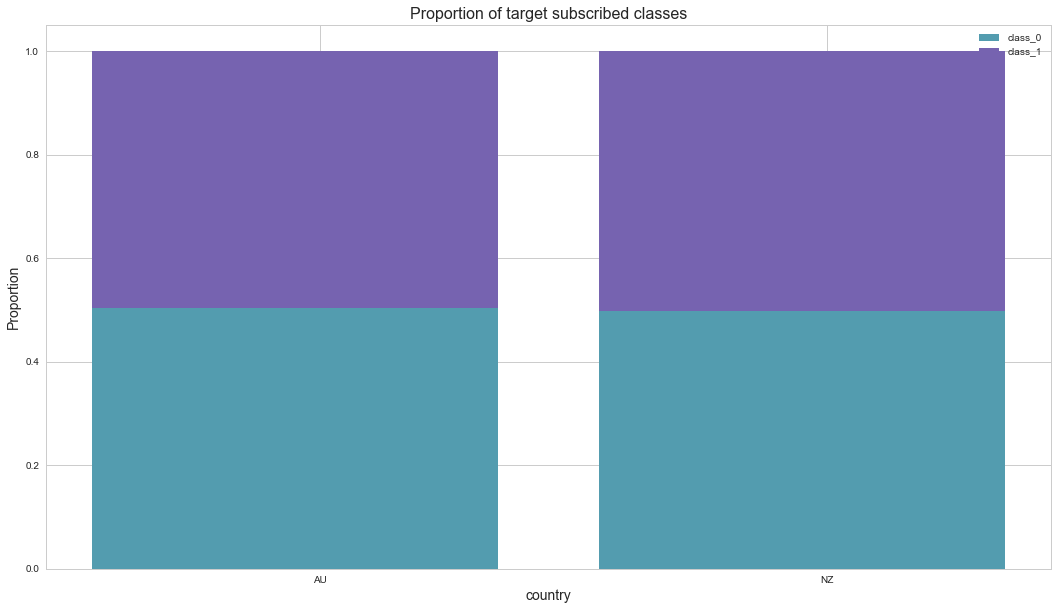

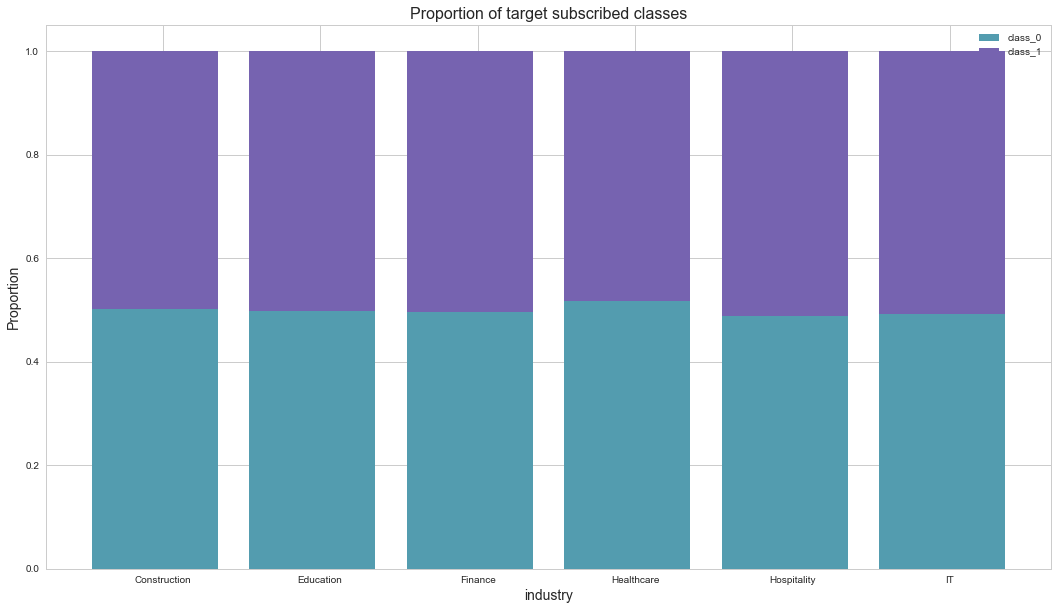

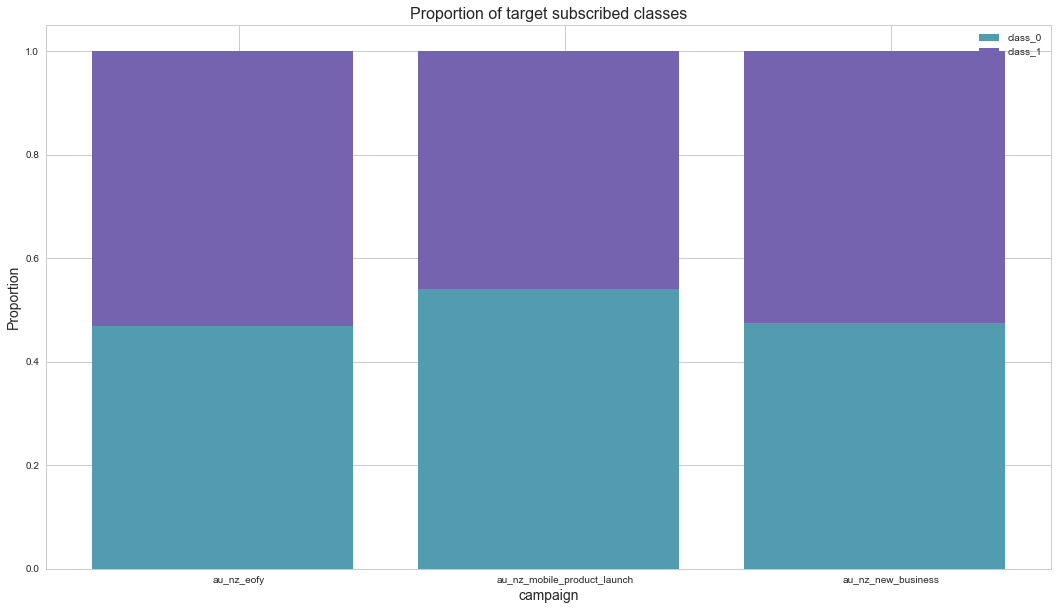

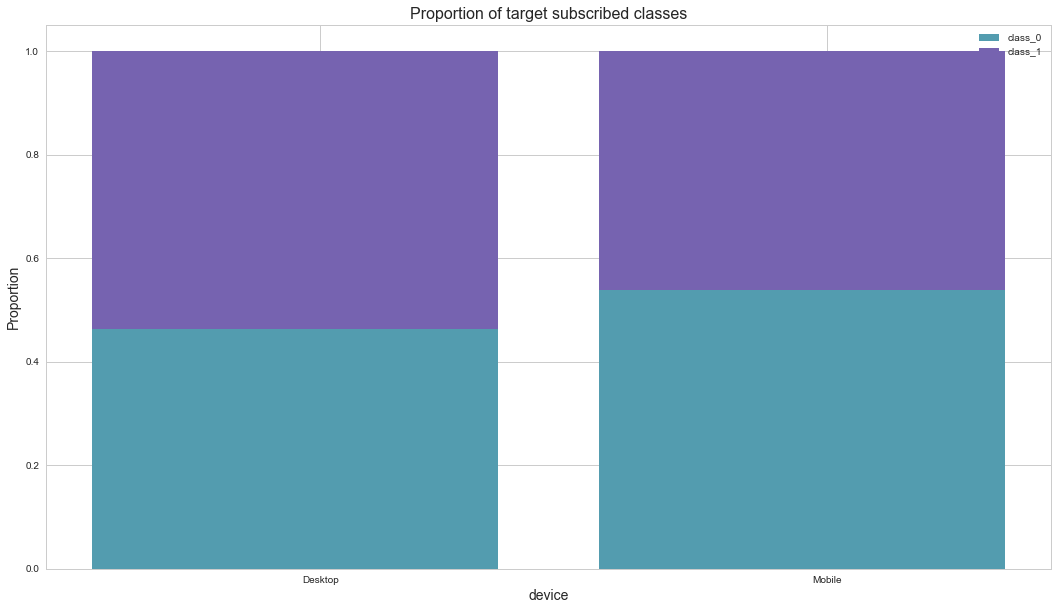

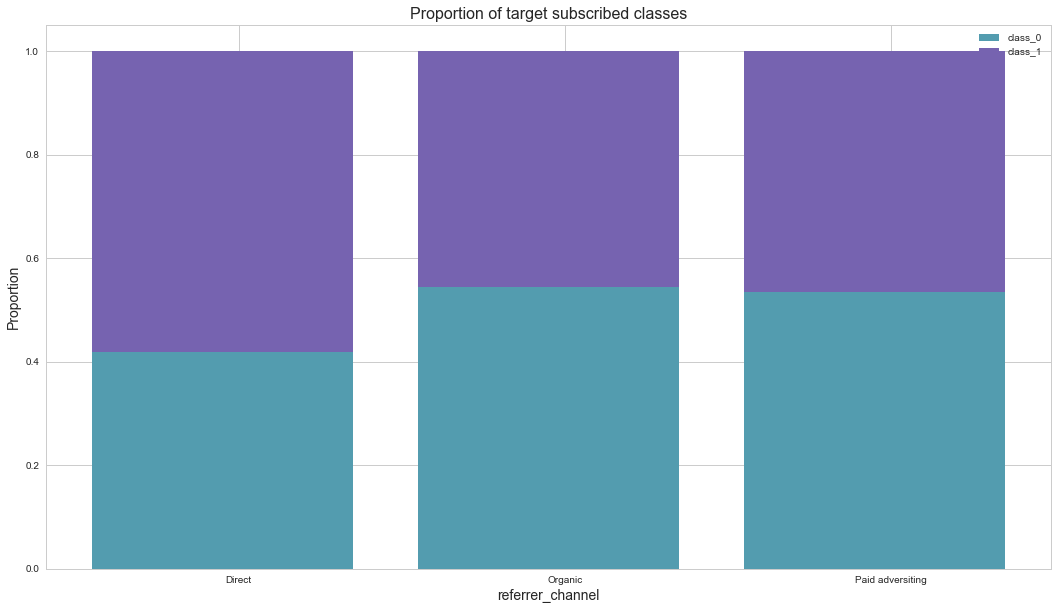

In [9]:
util.stackedbarplots(target = target)

### Feature ranking based on statistical tests

#### one-way ANOVA statistics for numerical features

In [10]:
util.show_one_way_anova_lm(target = target, order_by = anova_order_by, ascending = anova_ascending)

one_way_anova_lm statistics computed for 2 out of 2 features


,feature,sum_sq,esq_sm,F,PR(>F)
0,time_in_product_mins,435037.828,0.025,764.911,0.000000
1,email_open_rate_percent,50.110,0.000,0.060,0.806439


#### Chi-squared statistics for categorical features

In [11]:
util.show_chi_square_scs(target = target, order_by = chi2_order_by, ascending = chi2_ascending)

chi_square_of_df_cols computed for 5 out of 5 features


,feature,chi2,Pr(>chi)
0,referrer_channel,337.683,0.000
1,device,167.008,0.000
2,campaign,128.940,0.000
3,industry,8.598,0.126
4,country,0.561,0.454


### Summary of analysis

- The boxplot and overlaid histogram visual analysis has demonstrated that relatively higher values (> 40) of the numerical feature "time_in_product_mins" have a potential correlation with users who have subscribed to the product, whereas the values of the numerical feature "email_open_rate_percent" do not show a statistically significant correlation with product subscription. This has been verified with the ANOVA-based testing / ranking of the two features. 

- The contingency tables and stacked bar plots have shown that the categorical features "referrer_channel", "device", and "campaign" have potential correlation with product subscription. In particular, users having "Direct" referrer_channel values and "Desktop" device values show more tendency to be subscribed to the product in comparison with the users having other values in these features, whereas users having "au_nz_mobile_product_launch" campaign values show less tendency to be subscribed to the product in comparison with the users having other values in this feature. Chi-squared testing / ranking of the categorical features has confirmed the statistical significance of these three features. On the other hand, neither "industry" nor "country" has shown statistically significant correlation with the product subscription. 